In [16]:
# Manip data
import pandas as pd
import numpy as np

# Visu
import seaborn as sns
from matplotlib import pyplot as plt

# SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scikitplot.estimators import plot_learning_curve

# Evaluate
from sklearn.metrics import r2_score,max_error,mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve

import pickle

In [5]:
df = pd.read_csv("data/2016_Building_Energy_Benchmarking.csv")

In [6]:
df.shape

(3376, 46)

# Preprocessing pour baseline model

In [7]:
# Drop colonnes useless à 1ere vue
df_dummy = df.drop(["BuildingType","PrimaryPropertyType","LargestPropertyUseType","ListOfAllPropertyUseTypes","TaxParcelIdentificationNumber","Neighborhood","OSEBuildingID", "DataYear", "PropertyName", "Address", "City", "State", "ZipCode", "Outlier","ComplianceStatus", "Comments", "DefaultData", "YearsENERGYSTARCertified", 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'], axis = 1 )

# Remplacer par moyenne
df_dummy["ENERGYSTARScore"] = round(df_dummy['ENERGYSTARScore'].fillna(df_dummy['ENERGYSTARScore'].mean()))

# Dropna restant
df_dummy.dropna(axis=0, inplace = True)
df_dummy.reset_index(drop=True, inplace=True)

In [8]:
X = df_dummy.drop(["GHGEmissionsIntensity", "TotalGHGEmissions", 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'Electricity(kBtu)'], axis=1)
y = df_dummy["TotalGHGEmissions"]

In [9]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# Encoding

 

In [10]:
# Normalisation
mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = pd.DataFrame(mms.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), index=X_test.index, columns=X_test.columns)

# Model + Evaluation

In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
baseline_lr_model = 'baseline_lr_model.sav'
pickle.dump(lr, open(baseline_lr_model, 'wb'))

In [12]:
y_pred = lr.predict(X_test_scaled)

In [13]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: 0.9963129828641267
MAE: 2.164422925942558
MSE: 1367.1261536405843
RMSE: 36.97466908088001


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

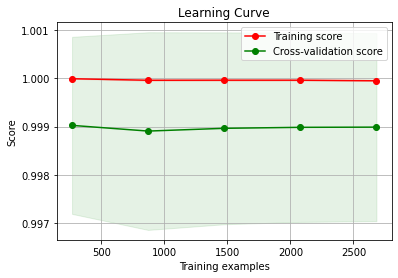

In [15]:
plot_learning_curve(lr, X, y)

# Tests

In [112]:
X_test

,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),NaturalGas(therms),NaturalGas(kBtu)
2233,2,47.570440,-122.334750,1954,1.0,2,21900,0,21900,21900.0,40.0,59.500000,1.302193e+06,1.439042e+06,0.0,7279.560059,727956.0
3150,3,47.620312,-122.320841,2012,1.0,7,224577,0,224577,246342.0,100.0,29.000000,7.811542e+06,7.895508e+06,0.0,25254.291020,2525429.0
704,7,47.614980,-122.343800,1978,1.0,13,91600,12365,79235,65706.0,18.0,53.099998,4.206840e+06,4.459113e+06,0.0,0.000000,0.0
1840,7,47.627820,-122.365830,1907,1.0,4,38407,0,38407,38407.0,57.0,31.500000,1.208169e+06,1.312808e+06,0.0,0.000000,0.0
2192,5,47.729170,-122.293700,1979,1.0,4,88096,0,88096,88096.0,39.0,30.900000,2.721296e+06,2.820544e+06,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,2,47.596030,-122.326000,1998,1.0,3,43380,0,43380,43380.0,48.0,73.400002,3.185108e+06,3.164265e+06,0.0,15610.780270,1561078.0
137,1,47.529150,-122.365110,2010,1.0,2,367884,0,367884,367884.0,97.0,33.299999,1.226552e+07,1.327934e+07,0.0,40604.957030,4060496.0
3004,3,47.613950,-122.312530,1951,1.0,2,36825,0,36825,44340.0,68.0,27.200001,1.755073e+06,1.892122e+06,0.0,8433.100586,843310.0
1592,5,47.697240,-122.348470,1987,1.0,3,24156,0,24156,20475.0,84.0,25.400000,5.202067e+05,5.664085e+05,0.0,0.000000,0.0


In [ ]:
df_dummy.BuildingType.value_counts()

In [93]:
df_dummy.describe()

,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3.353000e+03,3353.000000,3.353000e+03,3.353000e+03,...,3353.000000,3.353000e+03,3.353000e+03,3.353000e+03,3.353000e+03,3.353000e+03,3.353000e+03,3.353000e+03,3353.000000,3353.000000
mean,4.437519,47.623945,-122.334769,1968.546675,1.107068,4.707128,9.471210e+04,8025.412168,8.668669e+04,7.887869e+04,...,137.970355,5.420231e+06,5.291954e+06,2.757424e+05,1.088767e+06,3.714873e+06,1.370617e+04,1.370617e+06,119.975306,1.178452
std,2.120980,0.047731,0.027184,33.112310,2.113046,5.505920,2.183705e+05,32402.708401,2.073641e+05,2.010615e+05,...,139.310439,2.166621e+07,1.597601e+07,3.920294e+06,4.361294e+06,1.488073e+07,6.722670e+04,6.722670e+06,539.898074,1.824494
min,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,...,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,3.000000,47.599850,-122.350550,1948.000000,1.000000,2.000000,2.847000e+04,0.000000,2.774400e+04,2.509100e+04,...,78.400002,9.299501e+05,9.789278e+05,0.000000e+00,1.874862e+05,6.397030e+05,0.000000e+00,0.000000e+00,9.560000,0.210000
50%,4.000000,47.618660,-122.332480,1974.000000,1.000000,4.000000,4.420200e+04,0.000000,4.322800e+04,3.988400e+04,...,101.199997,1.807738e+06,1.913404e+06,0.000000e+00,3.446753e+05,1.176032e+06,3.249570e+03,3.249570e+05,34.020000,0.620000
75%,7.000000,47.657010,-122.319470,1997.000000,1.000000,5.000000,9.112800e+04,0.000000,8.441500e+04,7.583000e+04,...,148.500000,4.225362e+06,4.390158e+06,0.000000e+00,8.290125e+05,2.828591e+06,1.189608e+04,1.189608e+06,94.010000,1.380000
max,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


<AxesSubplot:>

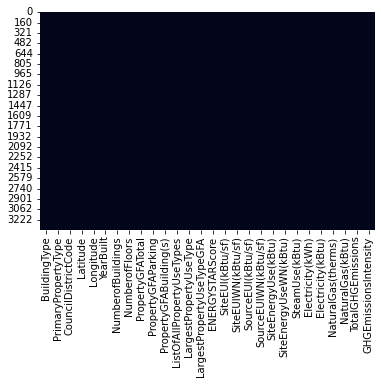

In [67]:
sns.heatmap(df_dummy.isnull(), cbar=False)

In [59]:
df_dummy.ENERGYSTARScore.value_counts()

68.0     868
100.0    109
98.0      72
96.0      64
89.0      58
        ... 
36.0       8
35.0       8
22.0       8
9.0        5
4.0        5
Name: ENERGYSTARScore, Length: 100, dtype: int64

<AxesSubplot:>

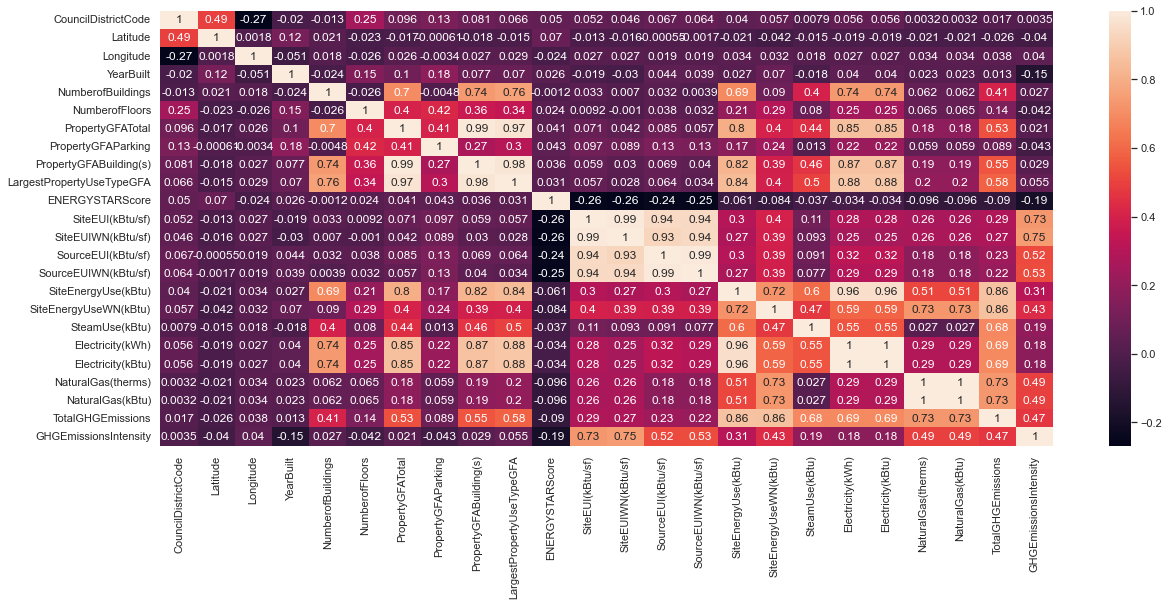

In [100]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(df_dummy.corr(), annot=True)

In [101]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = df_dummy.corr().unstack().sort_values()

In [103]:
pd.DataFrame(sorted_mat)

0
CouncilDistrictCode   Longitude             -0.267626
Longitude             CouncilDistrictCode   -0.267626
SiteEUIWN(kBtu/sf)    ENERGYSTARScore       -0.261574
ENERGYSTARScore       SiteEUIWN(kBtu/sf)    -0.261574
                      SiteEUI(kBtu/sf)      -0.256730
...                                               ...
Electricity(kWh)      Electricity(kWh)       1.000000
Electricity(kBtu)     Electricity(kBtu)      1.000000
NaturalGas(therms)    NaturalGas(therms)     1.000000
SiteEUI(kBtu/sf)      SiteEUI(kBtu/sf)       1.000000
GHGEmissionsIntensity GHGEmissionsIntensity  1.000000

[576 rows x 1 columns]